In [1]:
# ## APPLYING FOR 20_FETCH GROUP
# #Fetching train and test data from sci-kit learn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
import matplotlib.pyplot as plt
from keras import callbacks

In [2]:
# #Preparing train and test data
train20 = fetch_20newsgroups(subset='train', shuffle=True)
sentences = train20.data
y = train20.target

In [3]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
max_review_len = max([len(s.split()) for s in sentences])
vocab_size = len(tokenizer.word_index) + 1
sentences = tokenizer.texts_to_matrix(sentences)
padded_docs = pad_sequences(sentences, maxlen=max_review_len)

In [4]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=0)
model = Sequential()

In [5]:
model.add(layers.Dense(300,input_dim=11821, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)
#loss: 0.2391 - acc: 0.9635 - val_loss: 0.5926 - val_acc: 0.8360

Epoch 1/5
34/34 [==============================] - 1s 41ms/step - loss: 2.0388 - acc: 0.5625 - val_loss: 1.1989 - val_acc: 0.7653
Epoch 2/5
34/34 [==============================] - 1s 37ms/step - loss: 0.8115 - acc: 0.8510 - val_loss: 0.7917 - val_acc: 0.8098
Epoch 3/5
34/34 [==============================] - 1s 37ms/step - loss: 0.4881 - acc: 0.9091 - val_loss: 0.6795 - val_acc: 0.8218
Epoch 4/5
34/34 [==============================] - 1s 37ms/step - loss: 0.3390 - acc: 0.9415 - val_loss: 0.6247 - val_acc: 0.8332
Epoch 5/5
34/34 [==============================] - 1s 37ms/step - loss: 0.2467 - acc: 0.9622 - val_loss: 0.5911 - val_acc: 0.8332


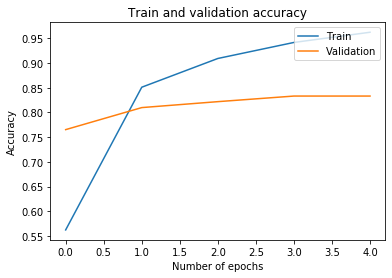

In [6]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train and validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
# Underfitting for accuracy (Error on the training data)

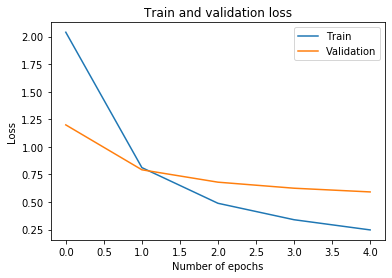

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [8]:
import numpy as np
pred = model.predict(X_test)
print(np.argmax(pred[2]))
print(y_test[2])

13
13
